### Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

#### Create Dataframe 

In [2]:
df = pd.read_csv("Shona_Articles.csv")

### Exploratory Data Analysis

In [3]:
df.head()

,category,headline,text,url
0,sports,‘Tagadzirira’ . . . bhora ngaritambwe.,KUCHANGE kusingadanwe anonzwa svondo rino ku...,https://www.kwayedza.co.zw/tagadzirira-bhora-n...
1,sports,Nhabvu yevechidiki yosimudzirwa,SHASHA dzakambonetsa munhabvu – Godfrey ‘God...,https://www.kwayedza.co.zw/nhabvu-yevechidiki-...
2,health,Nyanzvi dzeHutano Dzofara neKusashaya kweVanhu...,Bazi rezvehutano rakazivisa nemusi weChina kut...,https://www.voashona.com/a/zimbabwe-covid-19-d...
3,business,Dambudziko Rekushaya Mari muMabhanga Roenderer...,Nyazvi munyaya dzezvehupfumi uye vanhuwo zvavo...,https://www.voashona.com/a/zimbabwe-politics-c...
4,business,Kambani yeKwese TV Inopihwa Rezenisi Kuti Itep...,Sangano reZimbabwe Institute of Southern Afric...,https://www.voashona.com/a/zimbabwe-mobile-gia...


In [4]:
df.shape

(1288, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0    category  1288 non-null   object
 1   headline   1288 non-null   object
 2   text       1288 non-null   object
 3   url        1288 non-null   object
dtypes: object(4)
memory usage: 40.4+ KB


In [6]:
#check for unique values in the categories column
df[' category'].unique()

array(['sports', 'health', 'business', 'politics'], dtype=object)

In [7]:
# drop url column
df = df.drop(['url'],axis = 1)

In [8]:
df.head()

,category,headline,text
0,sports,‘Tagadzirira’ . . . bhora ngaritambwe.,KUCHANGE kusingadanwe anonzwa svondo rino ku...
1,sports,Nhabvu yevechidiki yosimudzirwa,SHASHA dzakambonetsa munhabvu – Godfrey ‘God...
2,health,Nyanzvi dzeHutano Dzofara neKusashaya kweVanhu...,Bazi rezvehutano rakazivisa nemusi weChina kut...
3,business,Dambudziko Rekushaya Mari muMabhanga Roenderer...,Nyazvi munyaya dzezvehupfumi uye vanhuwo zvavo...
4,business,Kambani yeKwese TV Inopihwa Rezenisi Kuti Itep...,Sangano reZimbabwe Institute of Southern Afric...


In [9]:
# Check for duplicate records
df[df.duplicated()== True]

,category,headline,text


In [10]:
# rename categories column to remove blank space before the label
df = df.rename(columns = {' category':'categories'},)

###  Text Preprocessing

In [11]:
# convert text into lower case and drop duplicate columns
df['text1'] = df['text'].str.lower()
df['headline1']=df['headline'].str.lower()
df = df.drop(['text','headline'],axis = 1)
df.head()

,categories,text1,headline1
0,sports,kuchange kusingadanwe anonzwa svondo rino ku...,‘tagadzirira’ . . . bhora ngaritambwe.
1,sports,shasha dzakambonetsa munhabvu – godfrey ‘god...,nhabvu yevechidiki yosimudzirwa
2,health,bazi rezvehutano rakazivisa nemusi wechina kut...,nyanzvi dzehutano dzofara nekusashaya kwevanhu...
3,business,nyazvi munyaya dzezvehupfumi uye vanhuwo zvavo...,dambudziko rekushaya mari mumabhanga roenderer...
4,business,sangano rezimbabwe institute of southern afric...,kambani yekwese tv inopihwa rezenisi kuti itep...


In [12]:
import string


In [13]:
# Variable that contains all punctuations 
punctuation= string.punctuation

In [14]:
#Create a function to remove punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',punctuation))

In [15]:
#use lambda to call the function created above 
df['text1'] = df['text1'].apply(lambda x:remove_punc(x))
df['headline1'] = df['headline1'].apply(lambda x:remove_punc(x))
df.head()

,categories,text1,headline1
0,sports,kuchange kusingadanwe anonzwa svondo rino ku...,‘tagadzirira’ bhora ngaritambwe
1,sports,shasha dzakambonetsa munhabvu – godfrey ‘god...,nhabvu yevechidiki yosimudzirwa
2,health,bazi rezvehutano rakazivisa nemusi wechina kut...,nyanzvi dzehutano dzofara nekusashaya kwevanhu...
3,business,nyazvi munyaya dzezvehupfumi uye vanhuwo zvavo...,dambudziko rekushaya mari mumabhanga roenderer...
4,business,sangano rezimbabwe institute of southern afric...,kambani yekwese tv inopihwa rezenisi kuti itep...


In [16]:
#remove stopwords
stopwords= pd.read_csv("stopwords.csv")
shona_stopwords= stopwords["Stopwords"].tolist()# convert csv with stopwords to list
shona_stopwords=[x.strip(' ') for x in shona_stopwords]# remove all leading and trailing white spaces using list comprehension
shona_stopwords

['asi',
 'vano',
 'kuti',
 'sezvo',
 'kuita',
 'ne',
 'che',
 'cha',
 'muma',
 'aya',
 'ma',
 'ro',
 'ichi',
 've',
 'nemu',
 'kana',
 'chi',
 'avo',
 'va',
 'vaka',
 'mu',
 'ona',
 'chi',
 'uyu',
 'we',
 'ra',
 'neva',
 've',
 'mwe',
 'zva',
 'izvi',
 'zvi',
 'rino',
 'muna',
 'uye',
 'yavo',
 'pa',
 'vano',
 'vari',
 'ku',
 'ti',
 're',
 'ino',
 'pasi',
 'vati',
 'mu',
 'wo',
 'nema',
 'ari',
 'iri',
 'zviri',
 'kuma',
 'ku',
 'vamwe',
 'pa',
 'neku',
 'asi',
 'mbo',
 'ya',
 'dze',
 'ma',
 'zvino',
 'chete',
 'vachi',
 'ri',
 'zve',
 'dzi',
 'dza',
 'dza',
 'ra',
 'rwa',
 'va',
 'ava',
 'of',
 'aka',
 'ano',
 'kwa',
 'kwe',
 'ta',
 'pe',
 'zvaka',
 'iyi',
 'zvi',
 'dzwa',
 'ye',
 'yeku',
 'yaka',
 'iyo',
 're',
 'sa',
 'i',
 'wa',
 'kwa',
 'ravo',
 'media',
 'source',
 'currently',
 'available',
 'unavailable',
 'vanoti',
 'apo',
 'nekuti',
 'anoti',
 'uyo',
 'saka',
 'iye',
 'anodaro',
 'isu']

In [17]:
def remove_shona_stopwords(text, shona_stopwords):
    words = text.split()  #splits the text into individual words
    cleaned_text = [word for word in words if word.lower() not in shona_stopwords]  # Remove stopwords
    return " ".join(cleaned_text)  # Join the cleaned words back into a single string

In [18]:
df['text1'] = df['text1'].apply(lambda x:remove_shona_stopwords(x,shona_stopwords))# x as the input value
df['headline1'] = df['headline1'].apply(lambda x:remove_shona_stopwords(x,shona_stopwords))
df.head(10)

,categories,text1,headline1
0,sports,kuchange kusingadanwe anonzwa svondo kunhandar...,‘tagadzirira’ bhora ngaritambwe
1,sports,shasha dzakambonetsa munhabvu – godfrey ‘goda’...,nhabvu yevechidiki yosimudzirwa
2,health,bazi rezvehutano rakazivisa nemusi wechina huw...,nyanzvi dzehutano dzofara nekusashaya kwevanhu...
3,business,nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...,dambudziko rekushaya mari mumabhanga roenderer...
4,business,sangano rezimbabwe institute southern africazi...,kambani yekwese tv inopihwa rezenisi itepfenyu...
5,business,gavhuna wereserve bank zimbabwe vajohn mangudy...,vamangudya vokurudzirwa kuzadzikisa zvavanotau...
6,health,zimbabwe inoti ichange isingachabvumidze vanhu...,zimbabwe inovharwa kwemasvondo matatu kutanga ...
7,sports,mutambi wemawarriors nevestri yekuiceland — si...,zim ine tarenda songani
8,politics,vanhu vakawanda vane tarisiro yekuti zvinhu zv...,vakawanda munyika voisa tarisiro pahurumende i...
9,business,vazhinji vataura nestudio7 muchinhoyi nguva dz...,kanzuru yechinhoyi yotsamwisa vatyairi vedzimo...


In [19]:
# remove special characters
import re
def remove_special_char(text):
    if not isinstance(text, str):
        return '' 
    text = re.sub('[^a-zA-Z0-9]', ' ',text)
    text = re.sub('\s+', ' ',text)#replace any additional spaces with a single space
    return text

In [20]:
df['text1'] = df['text1'].apply(lambda x: remove_special_char(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_special_char(x))
df.head(5)

,categories,text1,headline1
0,sports,kuchange kusingadanwe anonzwa svondo kunhandar...,tagadzirira bhora ngaritambwe
1,sports,shasha dzakambonetsa munhabvu godfrey goda moy...,nhabvu yevechidiki yosimudzirwa
2,health,bazi rezvehutano rakazivisa nemusi wechina huw...,nyanzvi dzehutano dzofara nekusashaya kwevanhu...
3,business,nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...,dambudziko rekushaya mari mumabhanga roenderer...
4,business,sangano rezimbabwe institute southern africazi...,kambani yekwese tv inopihwa rezenisi itepfenyu...


In [21]:
#remove any url
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+','',text)

In [22]:
df['text1'] = df['text1'].apply(lambda x: remove_url(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_url(x))


In [23]:
#remove any html tags that might be in the dataset
def remove_tags(text):
    return re.sub(r'<.*?>','',text)

In [24]:
df['text1'] = df['text1'].apply(lambda x: remove_tags(x))
df['headline1'] = df['headline1'].apply(lambda x: remove_tags(x))


## Visualisation per category 

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import wordtree
import matplotlib.image as mpimg
import seaborn as sn

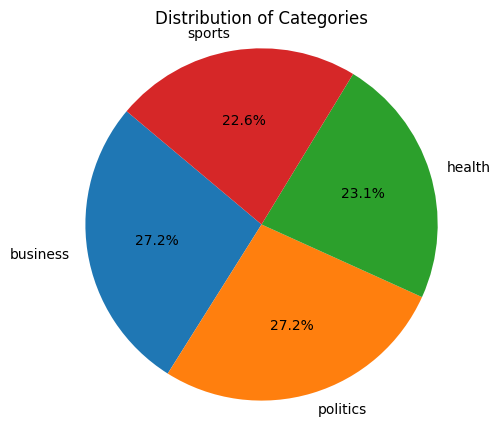

In [26]:
value_counts = df['categories'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Business Articles

In [27]:
df_business=df.loc[df['categories'] == 'business'] # create a new dataframe with business articles

text1= df_business['text1']

text1_rejoined=' '.join(str(x) for x in text1) #join individual tokens into strings


##### Word Cloud 

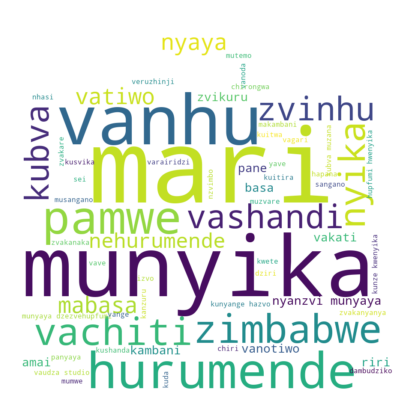

In [28]:
from PIL import Image
img = 'business.jpeg'
background_image = np.array(Image.open(img))
wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='viridis',  # vibrant color palette
    contour_color='white',
    contour_width=0,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text1_rejoined)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

##### Word Tree

  0%|          | 0/350 [00:00<?, ?it/s]

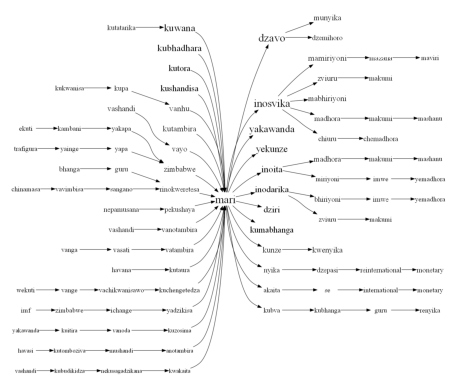

<Figure size 4800x4800 with 0 Axes>

In [29]:
# Define the keyword to center the word tree
keyword = "mari"

# Generate the word tree
g = wordtree.search_and_draw(corpus=text1, keyword=keyword)

# Render the word tree to a file
g.render(filename='business', format='png', cleanup=True)

img = mpimg.imread('business.png')
plt.imshow(img)
plt.axis('off') 
plt.figure(figsize=(12,12), dpi=400) # Hide axes
plt.show()

#### Political Articles

In [30]:
df_politics=df.loc[df['categories'] == 'politics'] # create a new dataframe with political articles

text2= df_politics['text1']

text2_rejoined=' '.join(str(x) for x in text2) #join individual tokens into strings



##### WordCloud

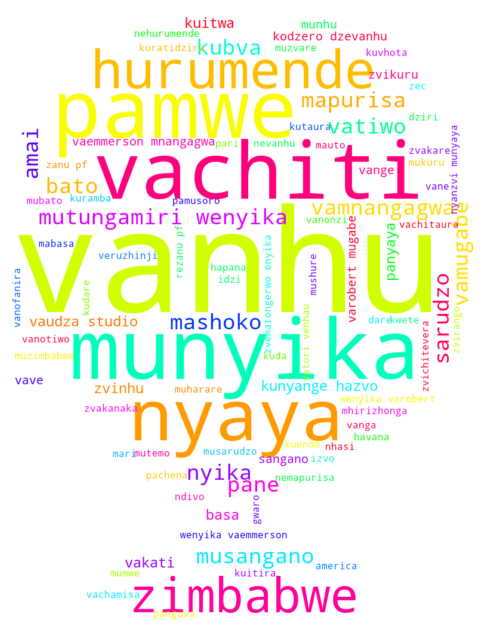

In [31]:
img = 'globe.jpeg'
background_image = np.array(Image.open(img))

wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='hsv_r',
    collocations=True,                     # vibrant color palette
    contour_color='black',
    contour_width=0,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text2_rejoined)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

###### WordTree

  0%|          | 0/350 [00:00<?, ?it/s]

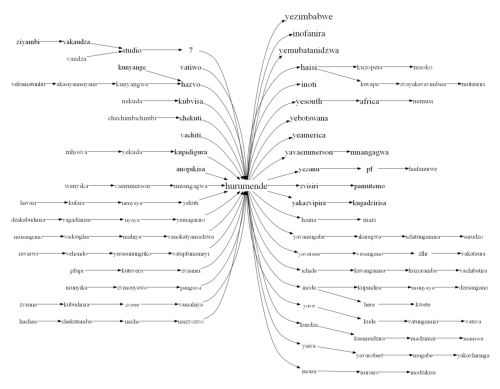

<Figure size 4800x4800 with 0 Axes>

In [32]:
# Define the keyword to center the word tree
keyword = "hurumende"

# Generate the word tree
g = wordtree.search_and_draw(corpus=text2, keyword=keyword)

# Render the word tree to a file
g.render(filename='politics', format='png', cleanup=True)

img = mpimg.imread('politics.png')
plt.imshow(img)
plt.axis('off') 
plt.figure(figsize=(12,12), dpi=400) # Hide axes
plt.show()


#### Health Articles

In [33]:
df_health=df.loc[df['categories'] == 'health'] # create a new dataframe with health articles

text3= df_health['text1']

text3_rejoined=' '.join(str(x) for x in text3) #join individual tokens into strings
 

##### Word Cloud

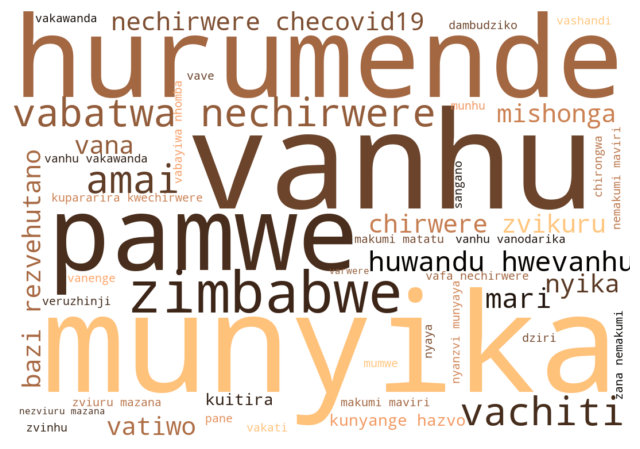

In [34]:
img = 'heath.jpeg'
background_image = np.array(Image.open(img))

wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='copper',
    collocations=True,                     # vibrant color palette
    contour_color='black',
    contour_width=1,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text3_rejoined)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

##### Word Tree

  0%|          | 0/297 [00:00<?, ?it/s]

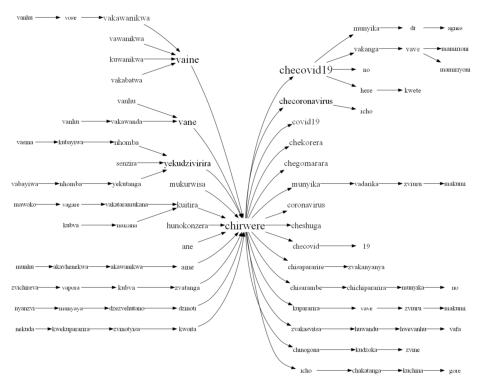

<Figure size 4800x4800 with 0 Axes>

In [35]:
# Define the keyword to center the word tree
keyword = "chirwere"

# Generate the word tree
g = wordtree.search_and_draw(corpus=text3, keyword=keyword)

g.render(filename='health', format='png', cleanup=True)

img = mpimg.imread('health.png')
plt.imshow(img)
plt.axis('off') 
plt.figure(figsize=(12,12), dpi=400) # Hide axes
plt.show()


#### Sports Articles

In [36]:
df_sports=df.loc[df['categories'] == 'sports'] # create a new dataframe with health articles

text4= df_sports['text1']

text4_rejoined=' '.join(str(x) for x in text4) #join individual tokens into strings



##### Wordcloud

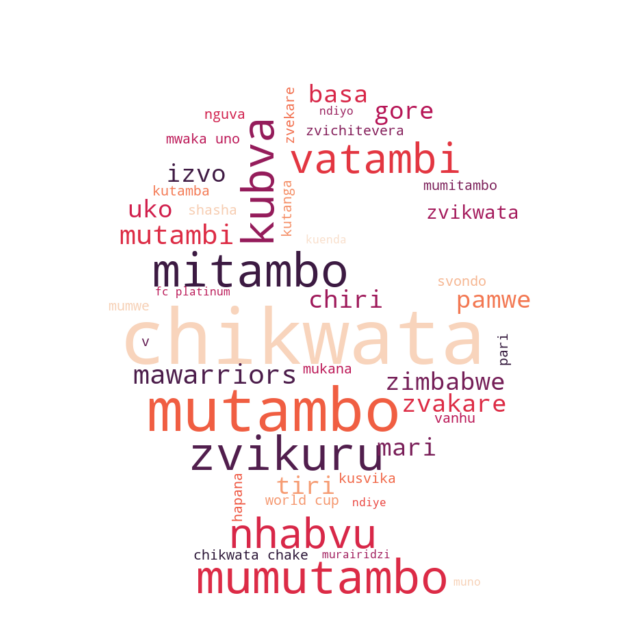

In [37]:
img = 'sport.jpeg'
background_image = np.array(Image.open(img))

wordcloud2 = WordCloud(background_color='white',  # white background for contrast
    width=300,  
    height=300, 
    max_font_size=60,  # largest font size
    colormap='rocket',
    collocations=True,                     # vibrant color palette
    contour_color='black',
    contour_width=0,# black contour to separate words clearly  # contour width
    mask=background_image,  # set the background image for the word cloud
    scale=4).generate(text4_rejoined)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud2, interpolation ='bilinear')

plt.axis('off')
plt.show()

##### Word Tree

  0%|          | 0/291 [00:00<?, ?it/s]

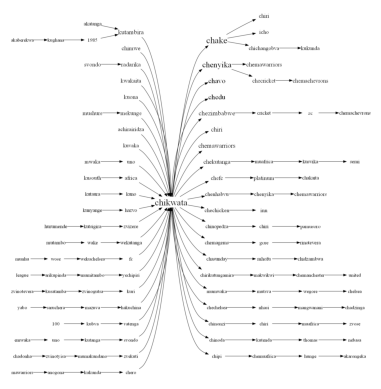

<Figure size 4800x4800 with 0 Axes>

In [38]:
# Define the keyword to center the word tree
keyword = "chikwata"

# Generate the word tree
g = wordtree.search_and_draw(corpus=text4, keyword=keyword)

g.render(filename='sport', format='png', cleanup=True)

img = mpimg.imread('sport.png')
plt.imshow(img)
plt.axis('off') 
plt.figure(figsize=(12,12), dpi=400) # Hide axes
plt.show()



## Tokenization

In [39]:
# break down text into smaller units known as tokens
#Model_1 -----> BantuBerta tokenizer
from transformers import RobertaTokenizer, RobertaModel

model_name="dsfsi/BantuBERTa"


#tokenizer_bantu = RobertaTokenizer.from_pretrained(model_name)
tokenizer =  RobertaTokenizer.from_pretrained(f"C:/Users/shami/cache/tokenizer/{model_name}")
model_name="dsfsi/BantuBERTa"
model =RobertaModel.from_pretrained(f"C:/Users/shami/cache/model/{model_name}")#classification head


Some weights of RobertaModel were not initialized from the model checkpoint at C:/Users/shami/cache/model/dsfsi/BantuBERTa and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
df['tokenized_tcolumn'] = df['text1'].apply(lambda x: tokenizer(x, padding='max_length', max_length=512, truncation=True, return_tensors='pt'))

df.head()

,categories,text1,headline1,tokenized_tcolumn
0,sports,kuchange kusingadanwe anonzwa svondo kunhandar...,tagadzirira bhora ngaritambwe,"[input_ids, attention_mask]"
1,sports,shasha dzakambonetsa munhabvu godfrey goda moy...,nhabvu yevechidiki yosimudzirwa,"[input_ids, attention_mask]"
2,health,bazi rezvehutano rakazivisa nemusi wechina huw...,nyanzvi dzehutano dzofara nekusashaya kwevanhu...,"[input_ids, attention_mask]"
3,business,nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...,dambudziko rekushaya mari mumabhanga roenderer...,"[input_ids, attention_mask]"
4,business,sangano rezimbabwe institute southern africazi...,kambani yekwese tv inopihwa rezenisi itepfenyu...,"[input_ids, attention_mask]"


In [41]:
import torch

tokenized_inputs_headlines = df['tokenized_tcolumn'].tolist()
all_embeddings = []

# Pass the list of tokenized inputs to the model
for tokens in tokenized_inputs_headlines:
    with torch.no_grad():
        inputs = {'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']}
        output_headlines = model(**inputs)
        last_hidden_stateh = output_headlines.last_hidden_state

    embeddings = last_hidden_stateh.squeeze(0)  # Remove batch dimension (assuming batch size is 1)
    sequence_embedding = embeddings.mean(dim=0)  # Mean pooling

    all_embeddings.append(sequence_embedding.detach().numpy())


In [42]:
df['h_emb']=all_embeddings
df.head()

,categories,text1,headline1,tokenized_tcolumn,h_emb
0,sports,kuchange kusingadanwe anonzwa svondo kunhandar...,tagadzirira bhora ngaritambwe,"[input_ids, attention_mask]","[0.044621874, -0.15604892, -0.12958021, -0.223..."
1,sports,shasha dzakambonetsa munhabvu godfrey goda moy...,nhabvu yevechidiki yosimudzirwa,"[input_ids, attention_mask]","[0.15882866, -0.3818276, -0.31087664, 0.065100..."
2,health,bazi rezvehutano rakazivisa nemusi wechina huw...,nyanzvi dzehutano dzofara nekusashaya kwevanhu...,"[input_ids, attention_mask]","[0.20290376, -0.22713442, 0.43283737, 1.194424..."
3,business,nyazvi munyaya dzezvehupfumi vanhuwo zvavo mun...,dambudziko rekushaya mari mumabhanga roenderer...,"[input_ids, attention_mask]","[0.21396217, -0.46089625, -0.10455391, -0.0896..."
4,business,sangano rezimbabwe institute southern africazi...,kambani yekwese tv inopihwa rezenisi itepfenyu...,"[input_ids, attention_mask]","[0.37922546, -0.4140148, 0.4663813, 0.7961778,..."


C:\Users\shami\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\shami\AppData\Local\Temp\ipykernel_27812\573224824.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')


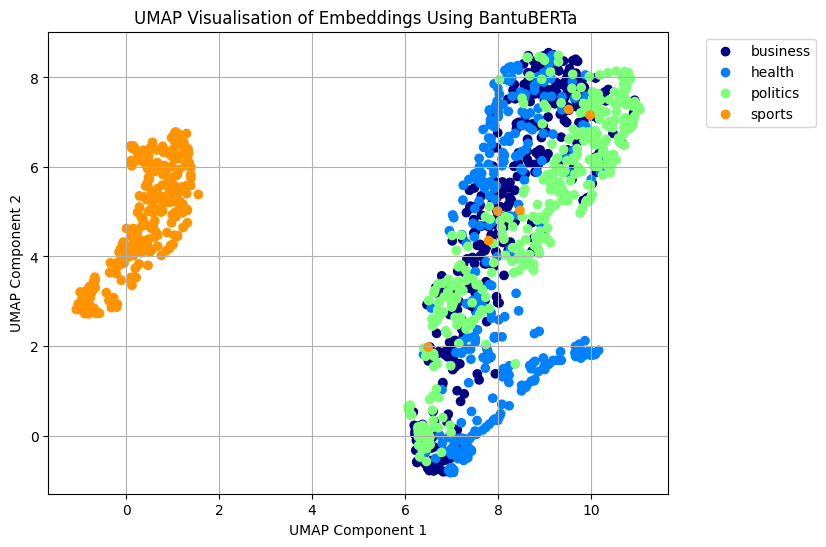

In [43]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import umap.umap_ as umap
# Assuming 'all_embeddings' is your high-dimensional data
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(all_embeddings)

plt.figure(figsize=(8, 6))
plt.grid()
c = 0
cmap = cm.get_cmap('jet')
for category in np.unique(df['categories']):
    idx = np.where(df['categories'] == category)
    plt.scatter(umap_results[idx, 0], umap_results[idx, 1], c=[cmap(c)]*len(idx[0]), label=category)
    c += 1 / len(np.unique(df['categories']))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualisation of Embeddings Using BantuBERTa ")
plt.show()


In [44]:
X = np.vstack(df['h_emb'].values)  # Stack lists into a 2D array

# Define your target variable 'y'
# Ensure 'y' is a NumPy array or pandas Series with the correct labels
y = df['categories'].values  # Replace 'target_column' with the actual column name for labels


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
# Train the model



In [46]:
model_NB = GaussianNB()

# Train the model
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    business       0.60      0.62      0.61        98
      health       0.65      0.74      0.69        85
    politics       0.81      0.72      0.76       115
      sports       0.99      0.96      0.97        89

    accuracy                           0.75       387
   macro avg       0.76      0.76      0.76       387
weighted avg       0.76      0.75      0.76       387



In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, y)
print(f'Silhouette Score: {score:.3f}')


C:\Users\shami\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.031


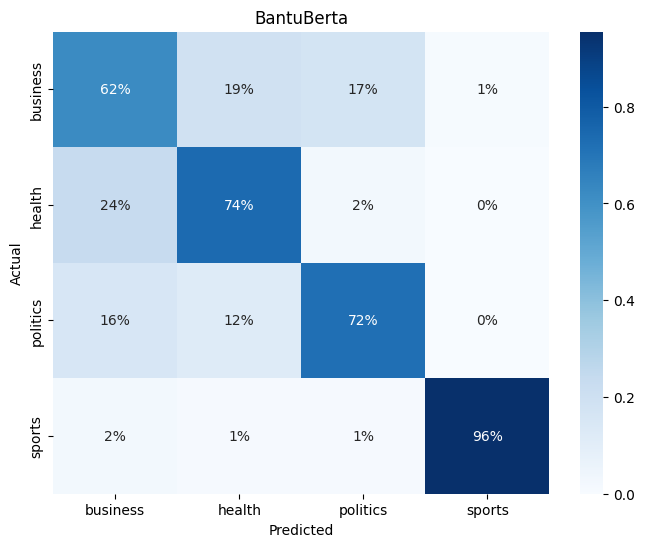

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)
class_names = ['business', 'health', 'politics', 'sports']  # Replace with your actual class names

# Normalize the confusion matrix by row (i.e., by the number of actual instances in each class)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.0%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('BantuBerta')
plt.show()


In [49]:
import numpy as np

def intra_inter_class_distances(X, y):
    n = len(y)
    dist = 0
    count_intra = 0
    dist_inter = 0
    count_inter = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            d = np.linalg.norm(X[i] - X[j])
            if y[i] == y[j]:
                dist += d
                count_intra += 1
            else:
                dist_inter += d
                count_inter += 1
    
    avg_intra = dist / count_intra if count_intra else 0
    avg_inter = dist_inter / count_inter if count_inter else 0
    return avg_intra, avg_inter

avg_intra, avg_inter = intra_inter_class_distances(X, y)
print(f'Average Intra-Class Distance: {avg_intra:.3f}')
print(f'Average Inter-Class Distance: {avg_inter:.3f}')
print(f'Ratio (intra/inter): {avg_intra / avg_inter:.3f}')


Average Intra-Class Distance: 9.376
Average Inter-Class Distance: 10.266
Ratio (intra/inter): 0.913
